# 1. make_blobs

> make_blobs는 군집화 테스트를 위한 데이터 생성기로 다음과 같은 파라미터를 갖는다.
- n_samples : 생성할 총 데이터의 개수이다. default는 100개이다.
- n_features : 데이터의 feature 개수이다. 시각화를 목표로 할 경우 2개로 설정해 보통 첫 번째 feature는 x 좌표, 두 번째 feature는 y 좌표상에 표현한다.
- centers : int 값, 예를 들어 3으로 설정하면 군집의 개수를 나타내고, ndarray 형태로 표현할 경우 개별 군집 중짐점의 좌표를 의미한다.
- cluster_std : 생성될 군집 데이터의 표준 편차를 의미한다. 만일 float 값 0.8과 같은 형태로 지정하면 군집 내에서 데이터가 표준 편차 0.8을 가진 값으로 만들어진다. [0.8, 1.2, 0.6]과 같은 형태로 표현되면 3개의 군집에서 첫 번째 군집 내 데이터의 표준편차는 0.8, 두번째 군집 내 데이터의 표준 편차는 1.2, 세번째 군집 내 데이터의 표준 편차는 0.6으로 만들어진다. 군집별로 서로 다른 표준 편차를 가진 dataset을 만들 때 사용된다.

# 2. 가상 데이터 만들기

In [30]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=200, centers=3, n_features=2, cluster_std=2, random_state=10)
print(X.shape, y.shape)

(200, 2) (200,)


In [31]:
import numpy as np

unique, counts = np.unique(y, return_counts=True)
unique, counts

(array([0, 1, 2]), array([67, 67, 66]))

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

clusterdf = pd.DataFrame(X, columns=['f1', 'f2'])
clusterdf['target'] = y

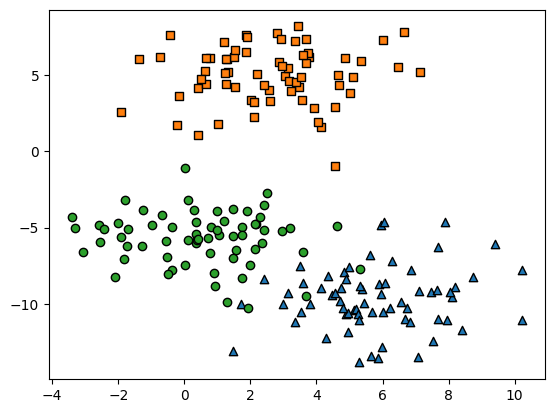

In [33]:
target_list = np.unique(y)

markers = ['^', 's', 'o']

for target in target_list:
    target_cluster = clusterdf[clusterdf['target'] == target]
    plt.scatter(x=target_cluster['f1'], y=target_cluster['f2'], marker=markers[target], edgecolors='k')
    
plt.show()

# 3. 가상 데이터 군집화

In [34]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=10)
cluster_labels = kmeans.fit_predict(X)
clusterdf['kmeans_label'] = cluster_labels

In [35]:
centers = kmeans.cluster_centers_
centers

array([[ 5.63257375, -9.63989595],
       [ 2.57526852,  5.09253821],
       [ 0.4176736 , -5.39095363]])

In [36]:
unique_labels = np.unique(cluster_labels)
markers = ['^', 's', 'o']

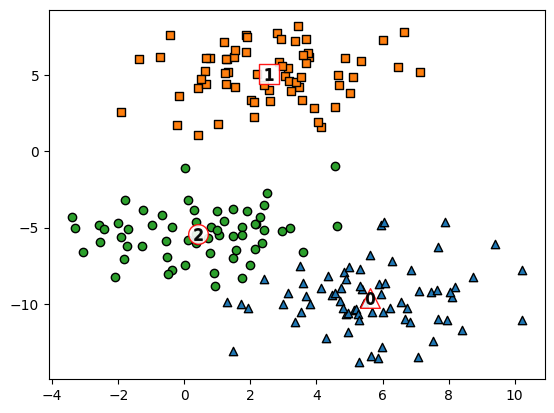

In [38]:
for label in unique_labels:
    label_cluster = clusterdf[clusterdf['kmeans_label'] == label]
    center_x_y = centers[label]
    
    plt.scatter(x=label_cluster['f1'], y=label_cluster['f2'], marker=markers[label], edgecolors='k')
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white', alpha=0.9, edgecolors='r', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', alpha=0.9, marker='$%d$'%label)
    
plt.show()